In [1]:
!pip install pandas numpy scikit-learn

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("cicddos2019_dataset.csv")
print(df.shape)

(431371, 80)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431371 entries, 0 to 431370
Data columns (total 80 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                431371 non-null  int64  
 1   Protocol                  431371 non-null  int64  
 2   Flow Duration             431371 non-null  int64  
 3   Total Fwd Packets         431371 non-null  int64  
 4   Total Backward Packets    431371 non-null  int64  
 5   Fwd Packets Length Total  431371 non-null  float64
 6   Bwd Packets Length Total  431371 non-null  float64
 7   Fwd Packet Length Max     431371 non-null  float64
 8   Fwd Packet Length Min     431371 non-null  float64
 9   Fwd Packet Length Mean    431371 non-null  float64
 10  Fwd Packet Length Std     431371 non-null  float64
 11  Bwd Packet Length Max     431371 non-null  float64
 12  Bwd Packet Length Min     431371 non-null  float64
 13  Bwd Packet Length Mean    431371 non-null  f

In [5]:
df = df.drop('SimillarHTTP', axis=1, errors='ignore')

In [6]:
df['Label'].value_counts()

DrDoS_NTP        121368
TFTP              98917
Benign            97831
Syn               49373
UDP               18090
DrDoS_UDP         10420
UDP-lag            8872
MSSQL              8523
DrDoS_MSSQL        6212
DrDoS_DNS          3669
DrDoS_SNMP         2717
LDAP               1906
DrDoS_LDAP         1440
Portmap             685
NetBIOS             644
DrDoS_NetBIOS       598
UDPLag               55
WebDDoS              51
Name: Label, dtype: int64

In [7]:
for column in df.columns:
    print(column)
    print(df[column].unique())

Unnamed: 0
[     0      1      2 ... 306198 306199 306200]
Protocol
[17  6  0]
Flow Duration
[216631      2     48 ... 337766  47709 322010]
Total Fwd Packets
[    6     2     4    20    24    16    18    12   126     8    10     1
    14    36    52    26     3    13    11    19     7    39    48    22
    17    30     5    46   131    21    27    32    40    28    25    56
    42   136   178    34    15    97    44    38    33    23   112    94
    29    50    54    60    88    58   340    31   156   393   252   826
   490    35    78    65   192    59    51   102    62   106   120   218
   160   116    43    74    68   108    95   294   168    93     9   184
    45   104   166   664   622    80   234    84    64    66   138   110
    37   118   124   310    89   122    41   200    79    72   148    76
   125   143    49    90    55   103   142    69   176   140    92   180
    96   114   135    63   172   162   113   216   288    73   426    82
    53    70   127 20444   278   121  

[2.7696867e+01 1.0000000e+06 4.1666668e+04 ... 1.1842518e+01 8.3841620e+01
 1.9564610e+02]
Flow IAT Mean
[4.33262000e+04 2.00000000e+00 4.80000000e+01 ... 1.12588664e+05
 1.59030000e+04 5.19370950e+03]
Flow IAT Std
[ 59304.016      0.     61959.79  ... 195005.83   27539.607  13598.718]
Flow IAT Max
[1.08616e+05 2.00000e+00 4.80000e+01 ... 3.37762e+05 4.77030e+04
 6.66780e+04]
Flow IAT Min
[0.0000e+00 2.0000e+00 4.8000e+01 ... 4.0794e+04 5.4875e+04 5.4965e+04]
Fwd IAT Total
[2.1663100e+05 2.0000000e+00 4.8000000e+01 ... 1.0190245e+07 1.0155604e+07
 2.5533000e+05]
Fwd IAT Mean
[4.3326200e+04 2.0000000e+00 4.8000000e+01 ... 6.7934970e+05 6.7704025e+05
 8.8044820e+03]
Fwd IAT Std
[  59304.016       0.      61959.79  ... 2579559.8   2546570.
   18204.479]
Fwd IAT Max
[1.0861600e+05 2.0000000e+00 4.8000000e+01 ... 1.0003464e+07 9.8809860e+06
 6.1964000e+04]
Fwd IAT Min
[0.0000000e+00 2.0000000e+00 4.8000000e+01 1.0000000e+00 3.0000000e+00
 5.1000000e+01 4.9000000e+01 4.6000000e+01 4.4000000e

[  0.      112.      128.      ... 501.125   605.125   225.57576]
Fwd Avg Bytes/Bulk
[0]
Fwd Avg Packets/Bulk
[0]
Fwd Avg Bulk Rate
[0]
Bwd Avg Bytes/Bulk
[0]
Bwd Avg Packets/Bulk
[0]
Bwd Avg Bulk Rate
[0]
Subflow Fwd Packets
[    6     2     4    20    24    16    18    12   126     8    10     1
    14    36    52    26     3    13    11    19     7    39    48    22
    17    30     5    46   131    21    27    32    40    28    25    56
    42   136   178    34    15    97    44    38    33    23   112    94
    29    50    54    60    88    58   340    31   156   393   252   826
   490    35    78    65   192    59    51   102    62   106   120   218
   160   116    43    74    68   108    95   294   168    93     9   184
    45   104   166   664   622    80   234    84    64    66   138   110
    37   118   124   310    89   122    41   200    79    72   148    76
   125   143    49    90    55   103   142    69   176   140    92   180
    96   114   135    63   172   162   113  

In [8]:
num=[]
cat=[]
for column in df.columns:
  if df[column].dtype == 'O':
    cat.append(column)
  else:
    num.append(column)

In [9]:
num

['Unnamed: 0',
 'Protocol',
 'Flow Duration',
 'Total Fwd Packets',
 'Total Backward Packets',
 'Fwd Packets Length Total',
 'Bwd Packets Length Total',
 'Fwd Packet Length Max',
 'Fwd Packet Length Min',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Bwd Packet Length Max',
 'Bwd Packet Length Min',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow Bytes/s',
 'Flow Packets/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Total',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'Fwd Header Length',
 'Bwd Header Length',
 'Fwd Packets/s',
 'Bwd Packets/s',
 'Packet Length Min',
 'Packet Length Max',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'FIN Flag Count',
 'SYN Flag Count',
 'RST Flag Count',
 'PSH Flag Count',
 'ACK Flag Count',
 'U

In [10]:
nullAttr=[]
for column in df.columns:
  if df[column].isnull().sum() != 0:
    nullAttr.append(column)

nullAttr

[]

In [11]:
for column in num:
  df[column].fillna(df[column].mean(),inplace=True)


In [12]:
cat

['Label', 'Class']

In [13]:
nullAttr=[]
for column in df.columns:
  if df[column].isnull().sum() != 0:
    nullAttr.append(column)

nullAttr

[]

In [14]:
for id in num:
  iqr = df[id].quantile(0.75) - df[id].quantile(0.25)
  upper_bound=df[id].quantile(0.75) + 1.5*iqr
  lower_bound=df[id].quantile(0.25) - 1.5*iqr
  df.loc[df[id]>=upper_bound,id]=upper_bound
  df.loc[df[id]<=lower_bound,id]=lower_bound

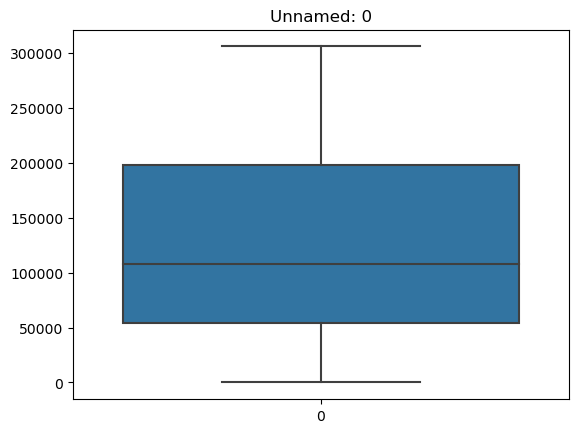

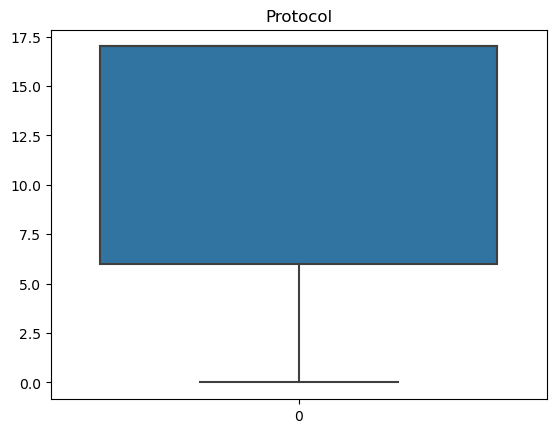

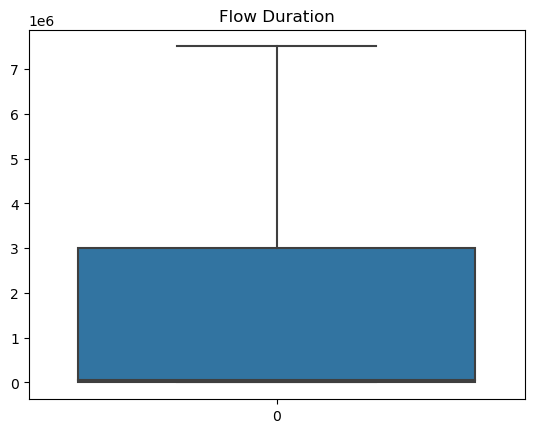

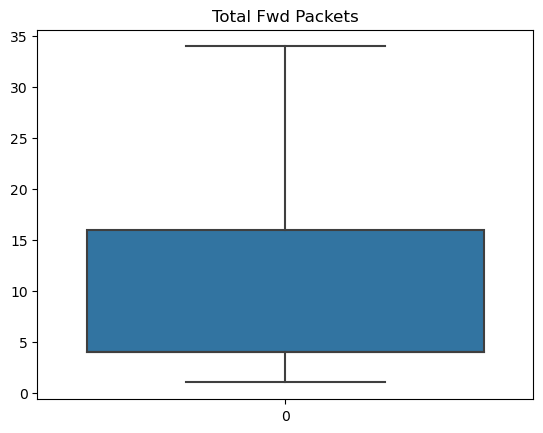

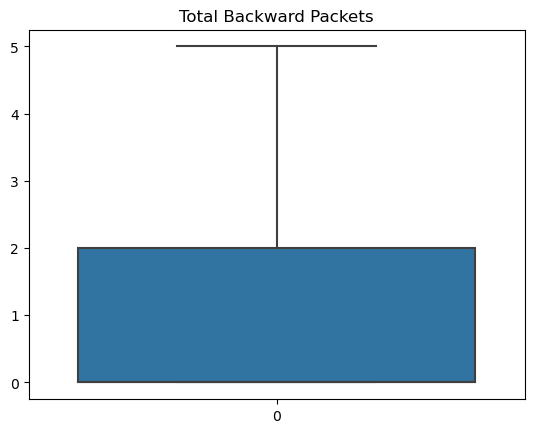

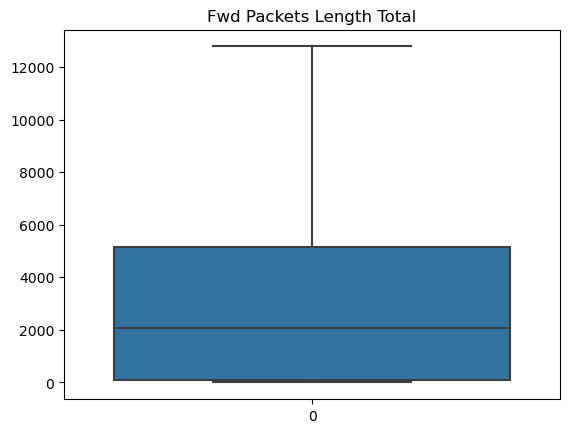

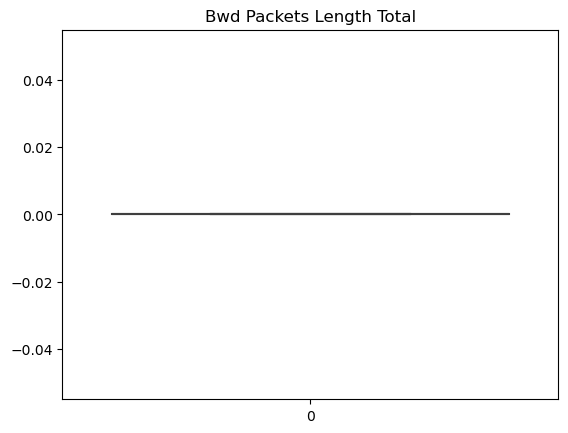

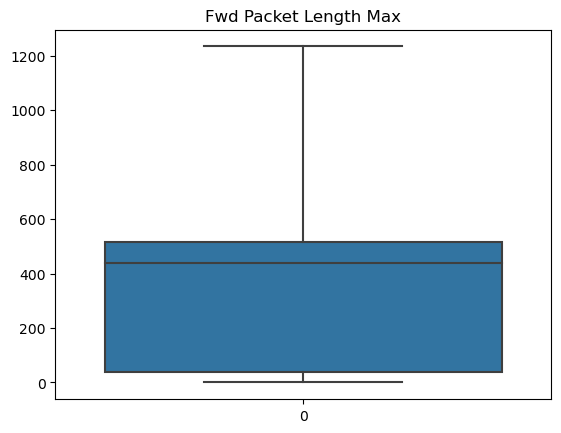

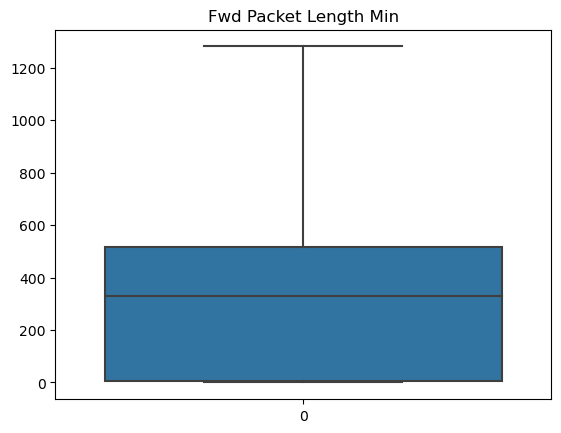

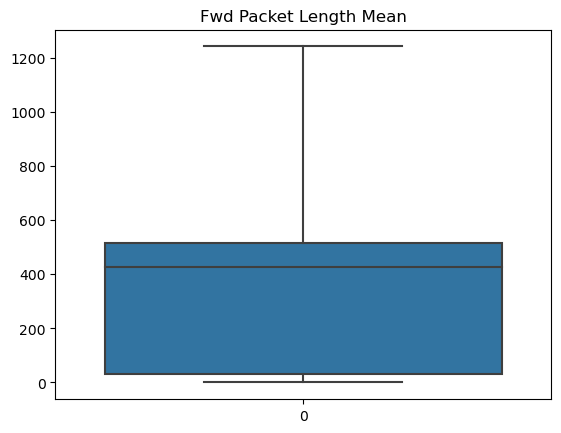

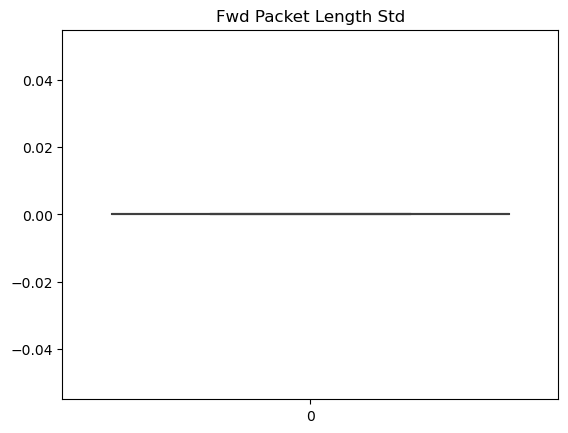

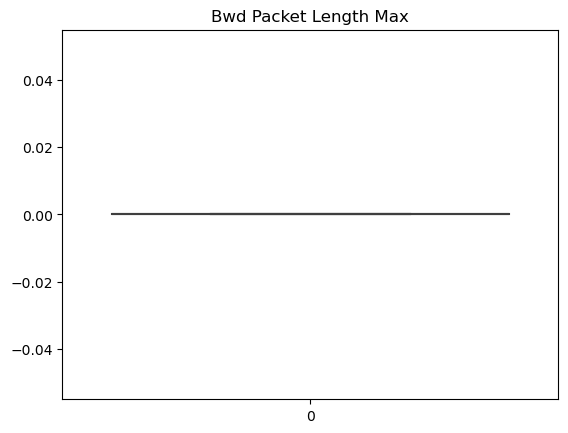

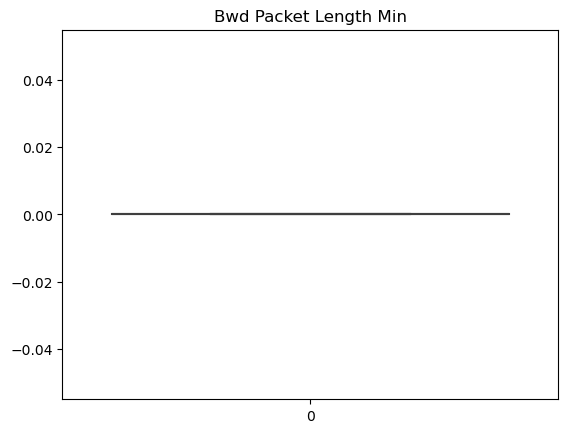

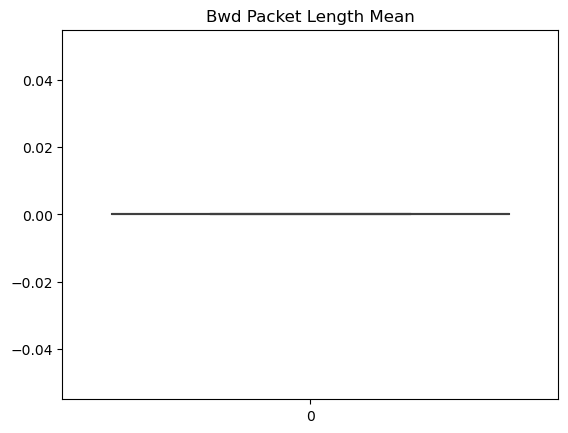

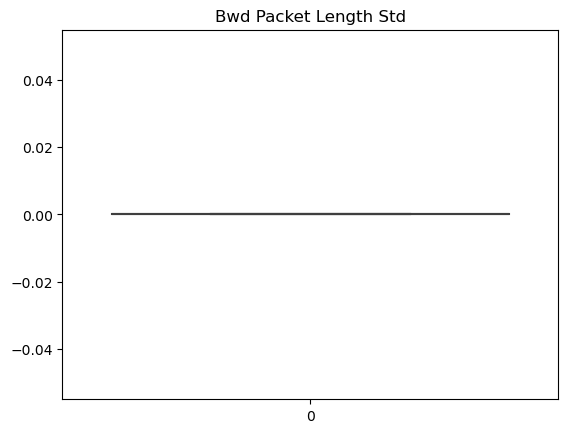

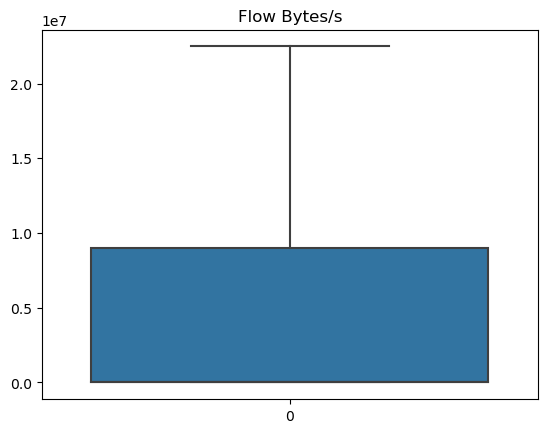

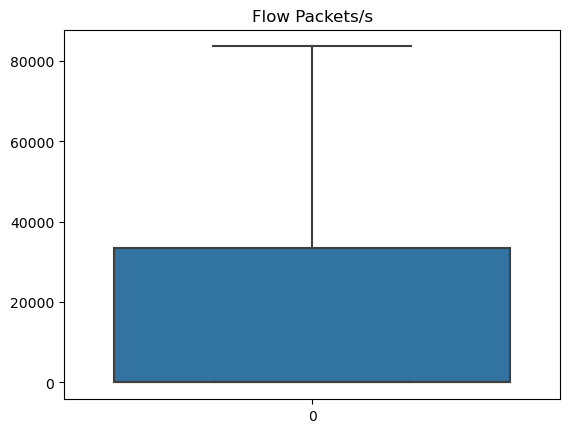

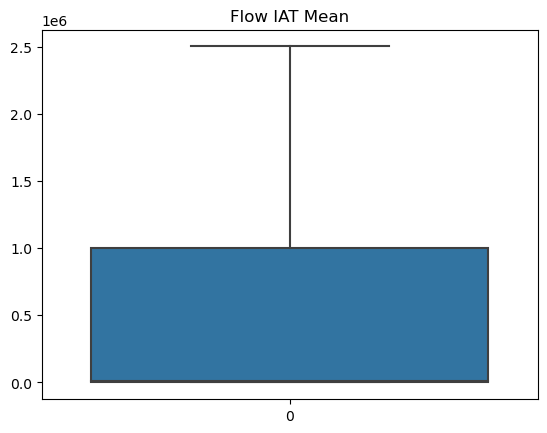

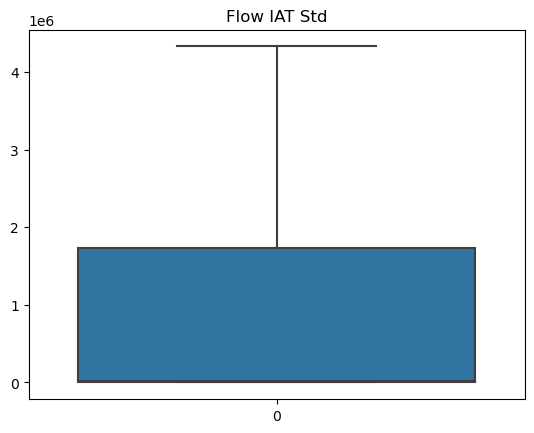

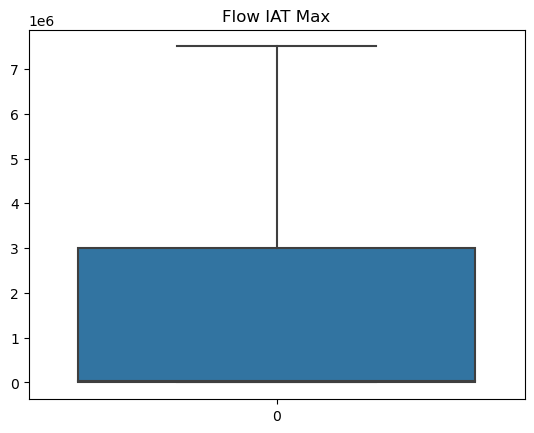

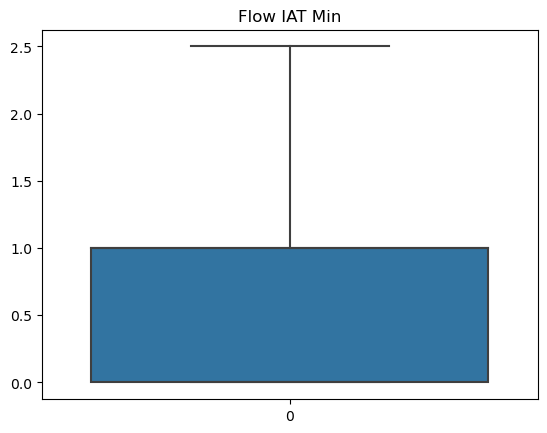

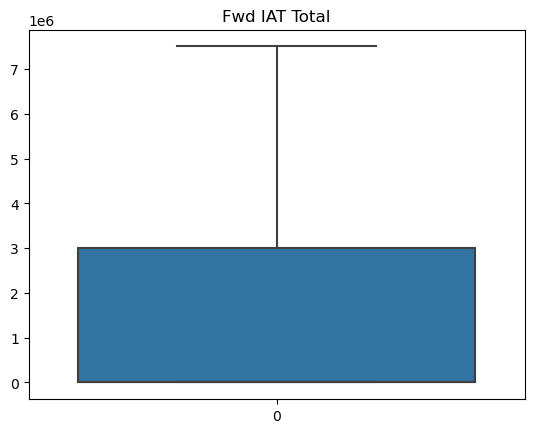

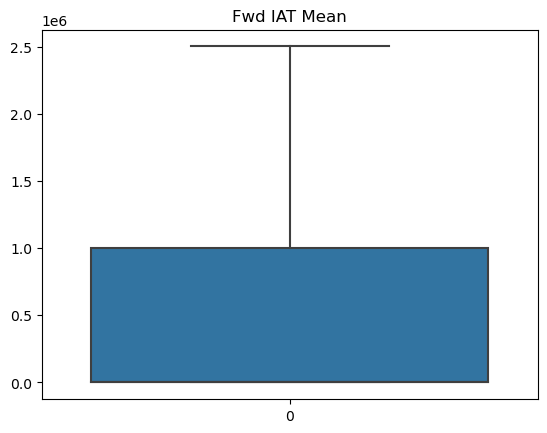

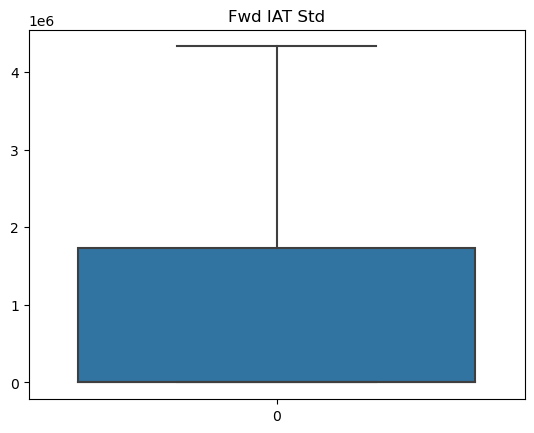

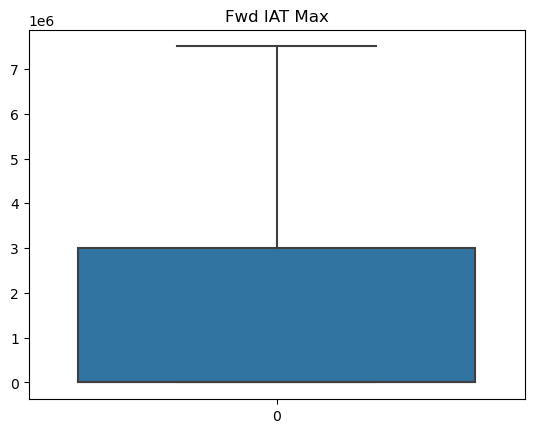

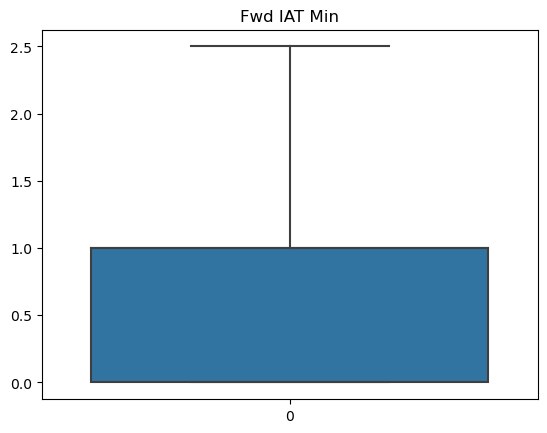

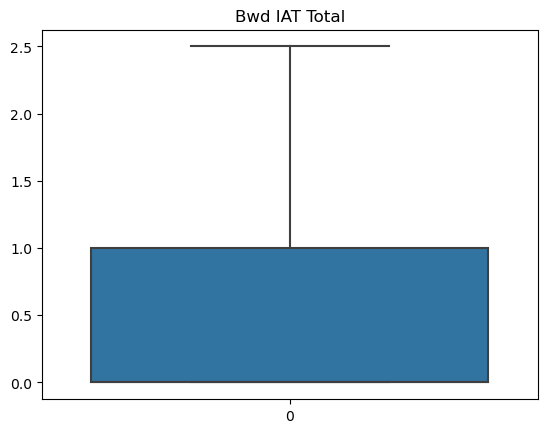

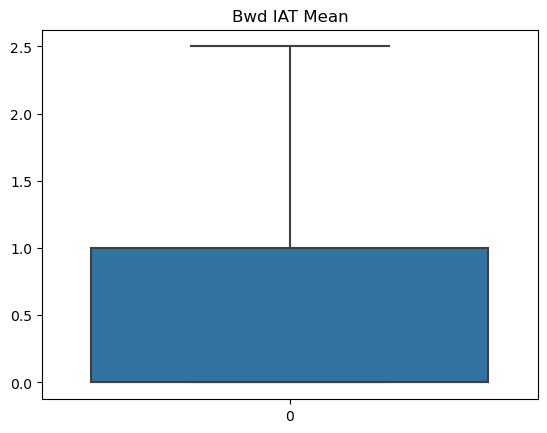

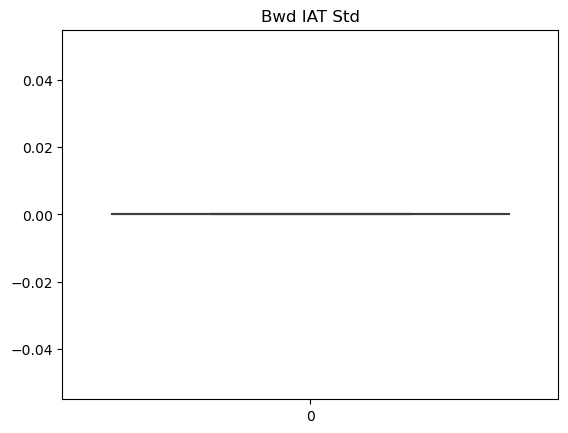

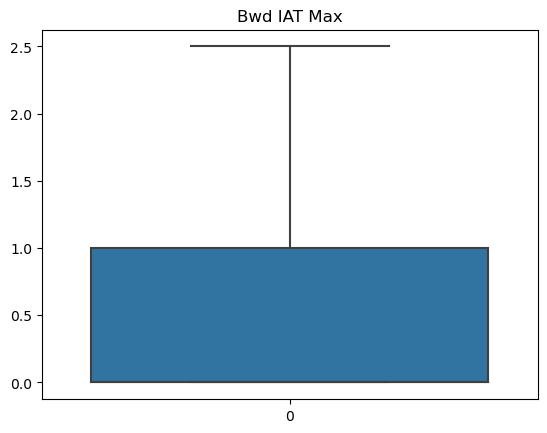

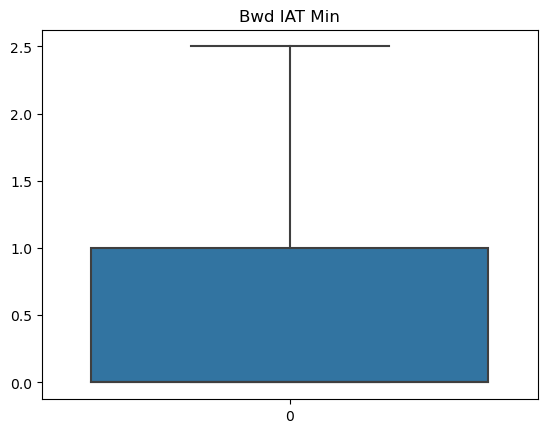

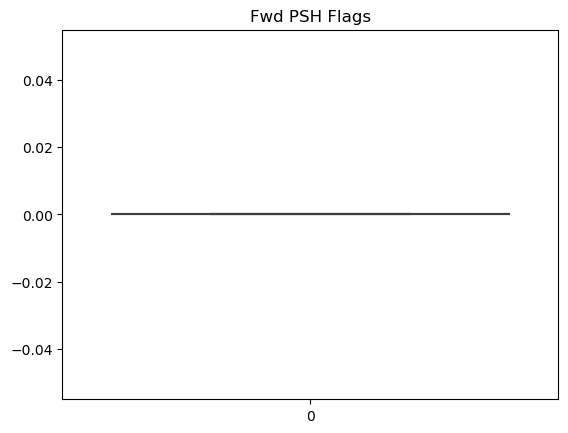

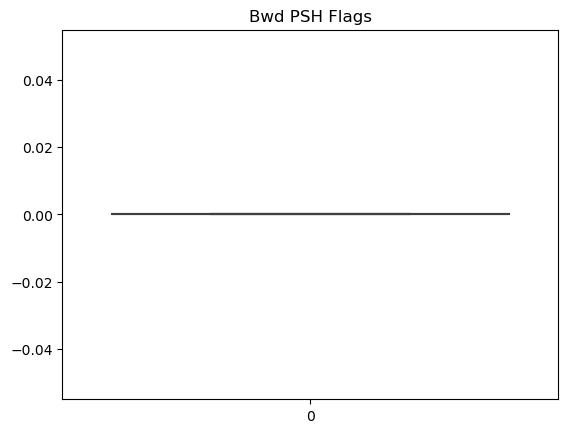

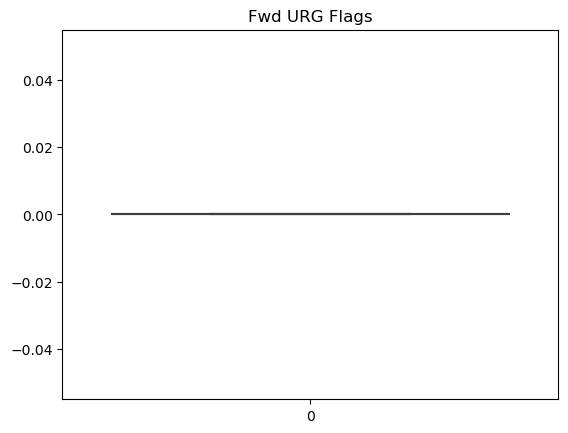

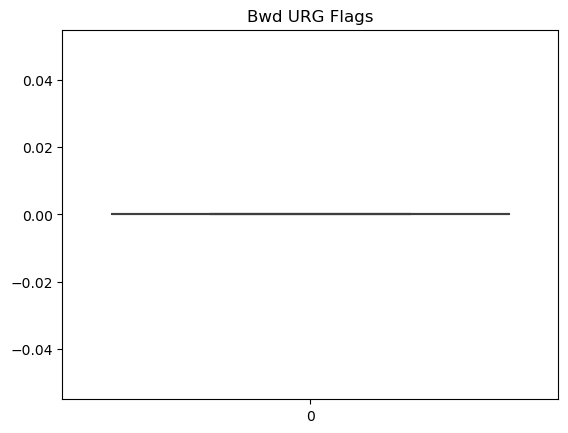

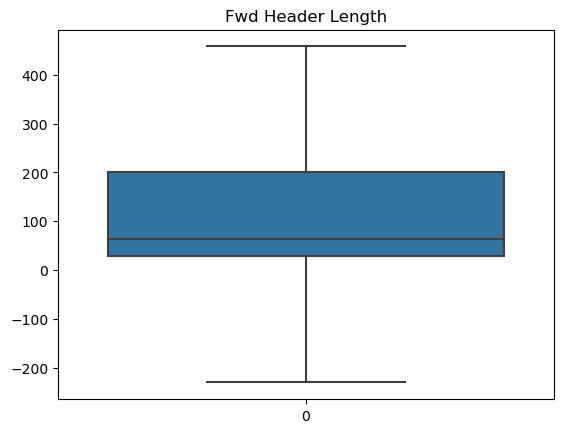

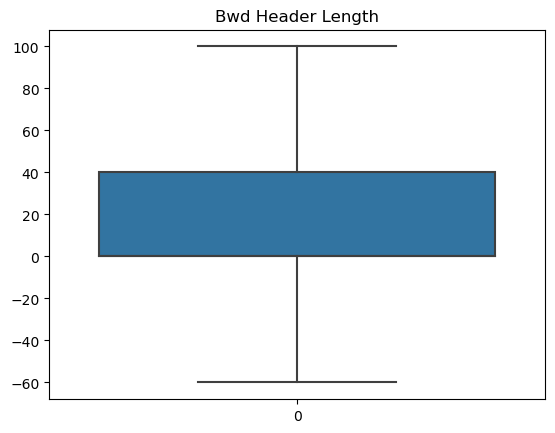

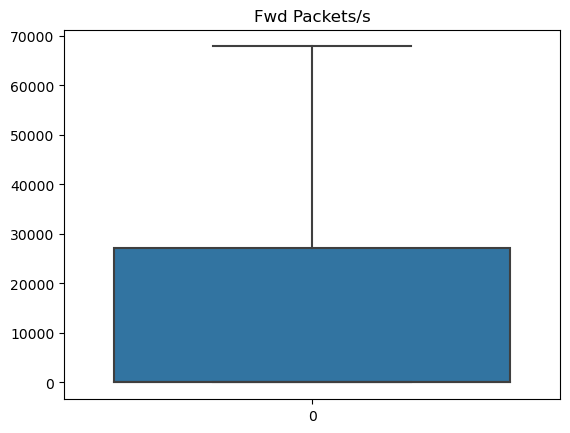

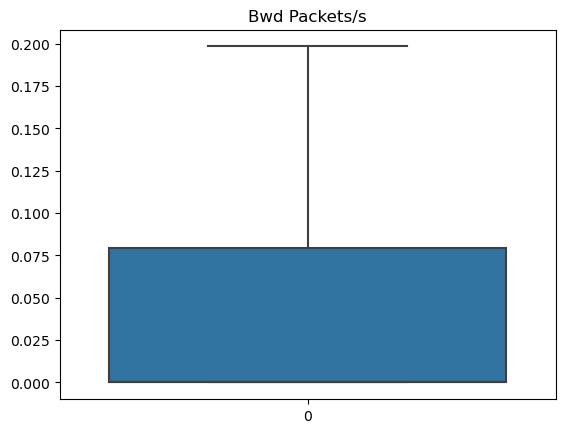

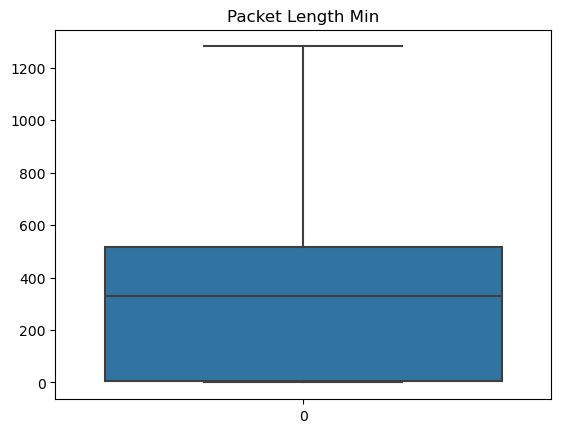

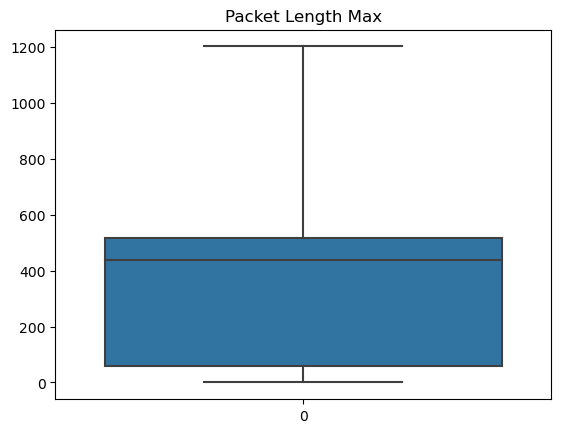

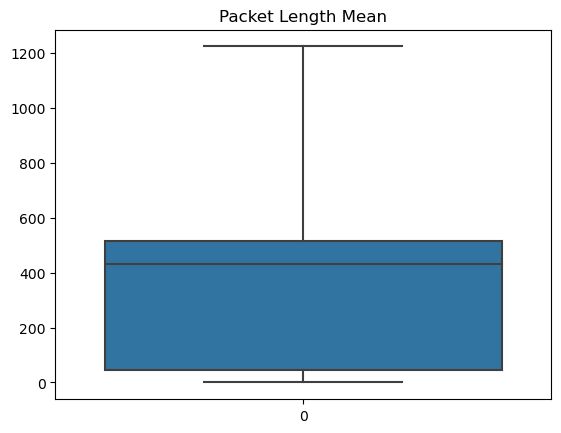

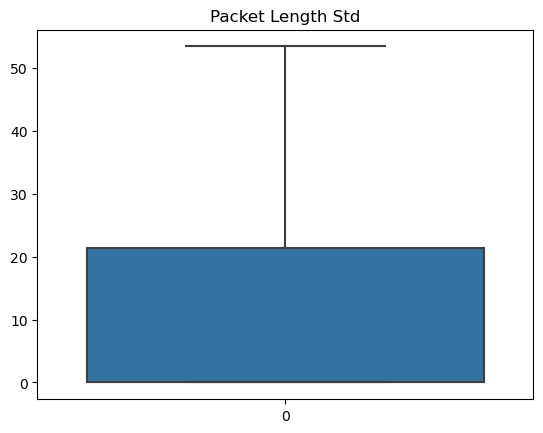

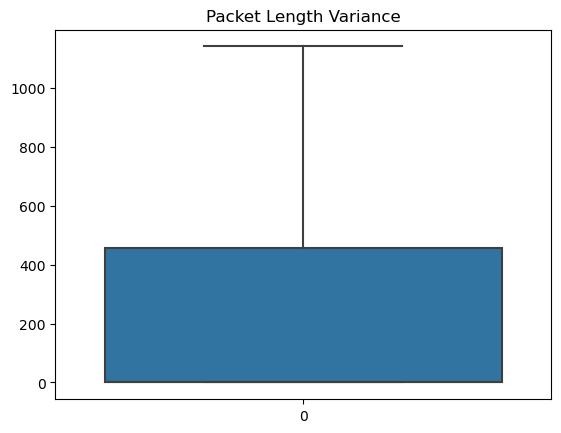

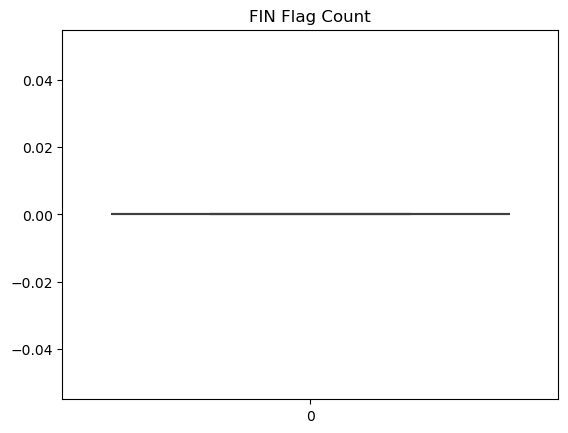

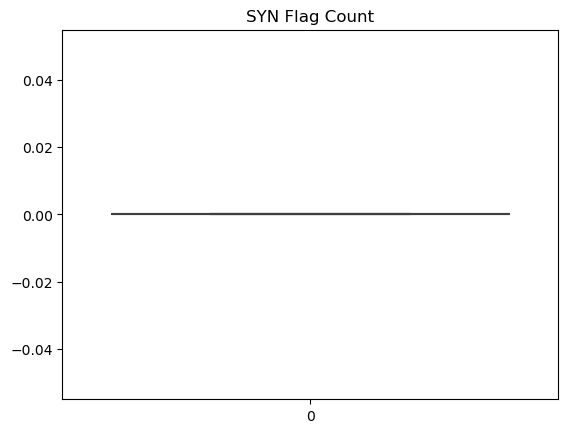

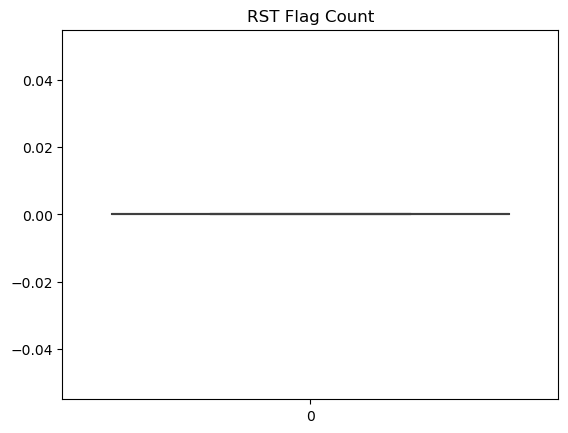

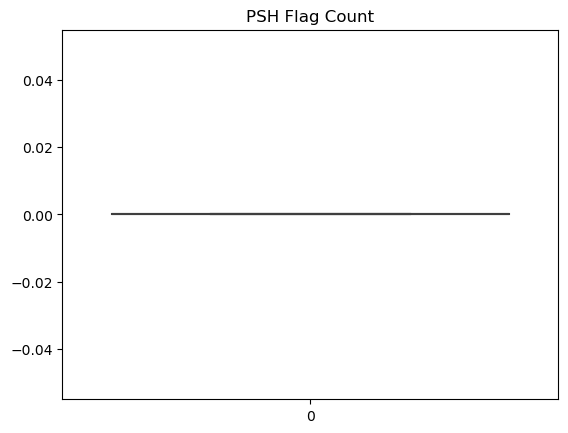

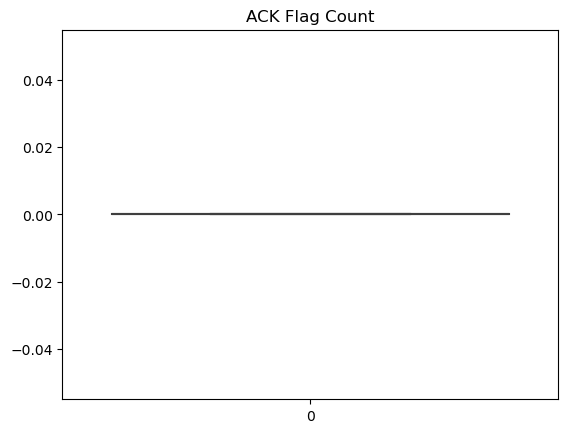

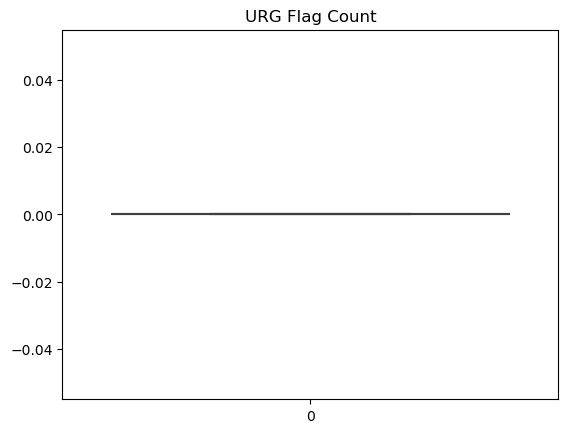

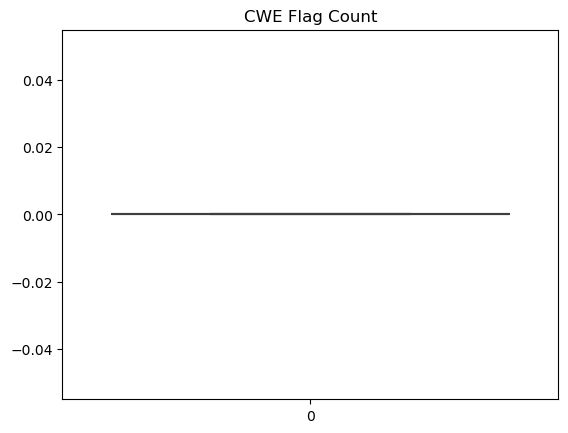

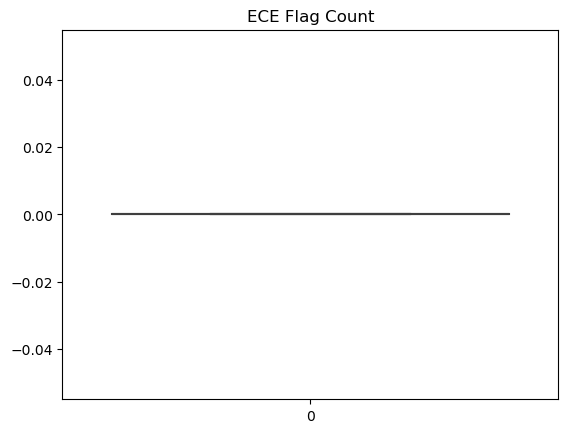

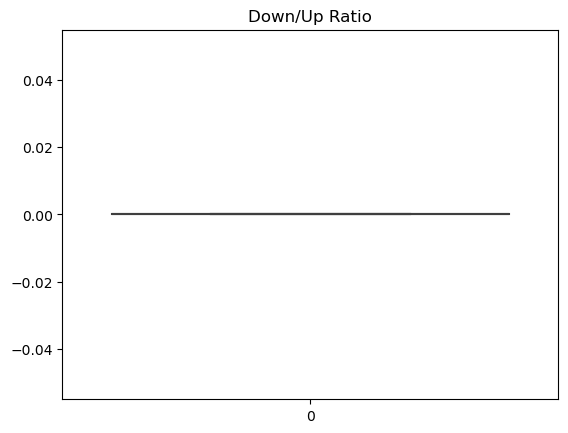

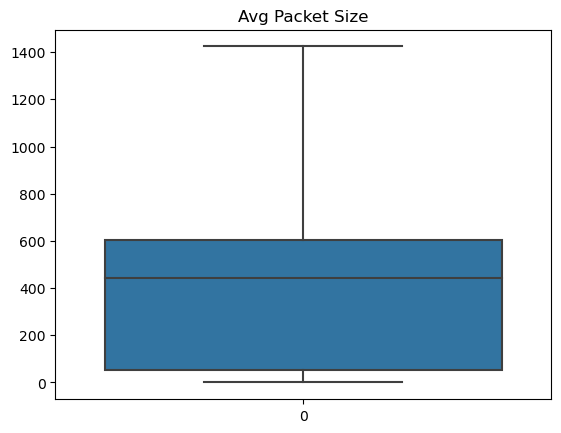

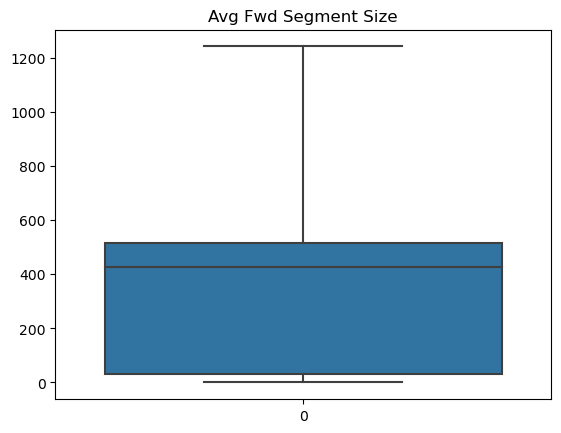

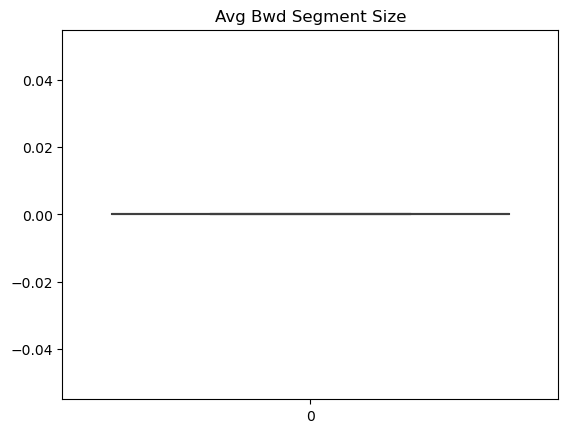

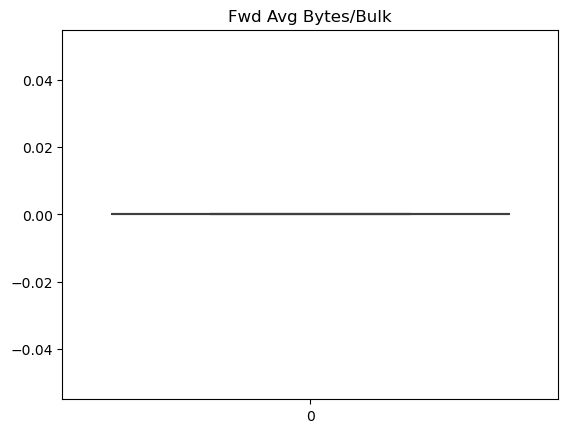

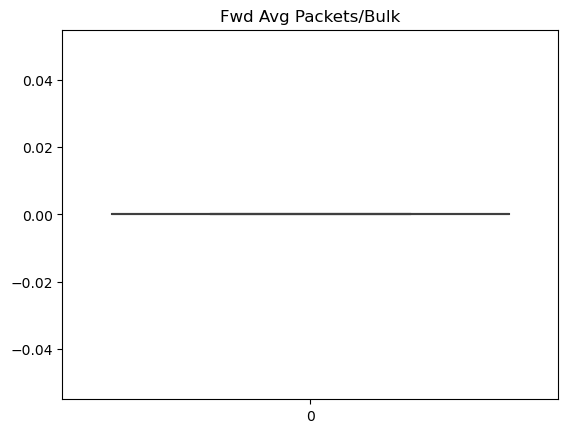

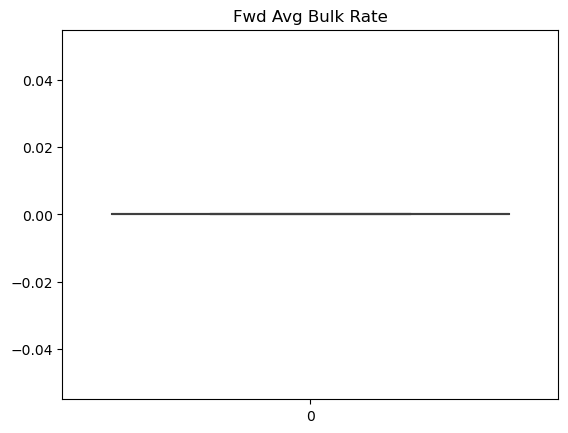

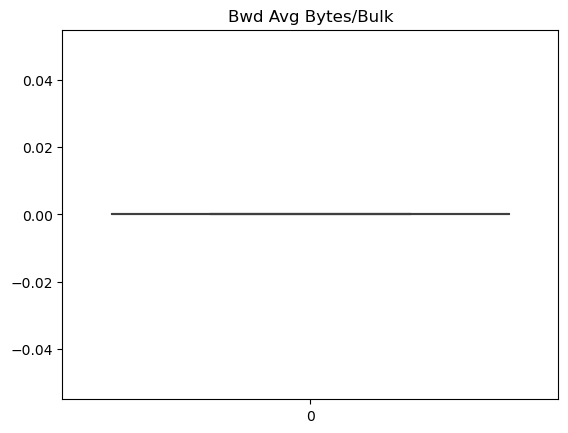

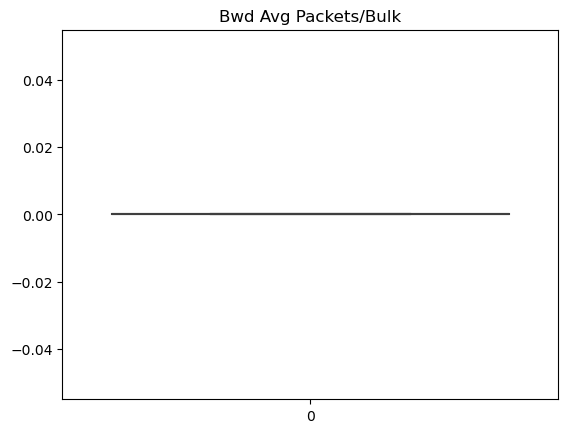

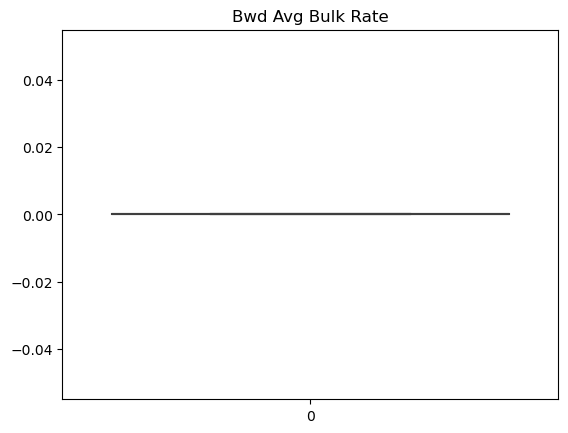

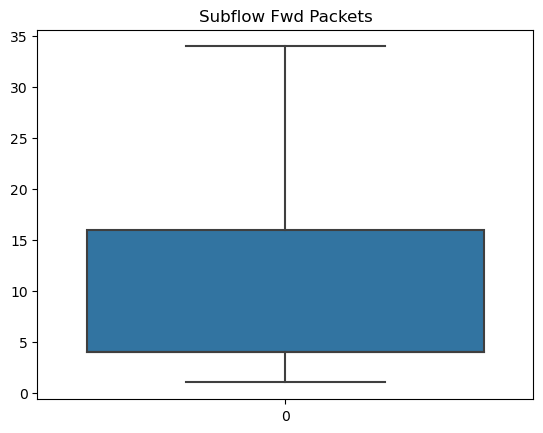

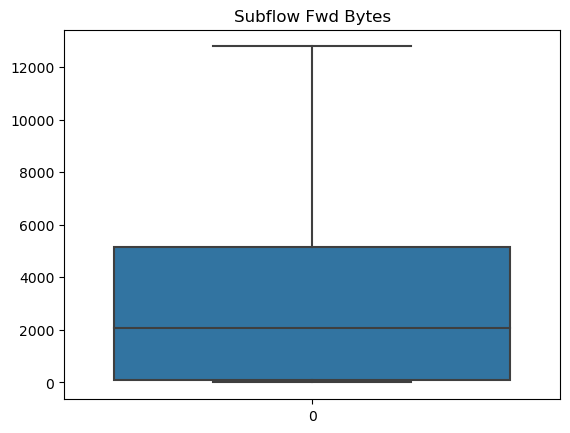

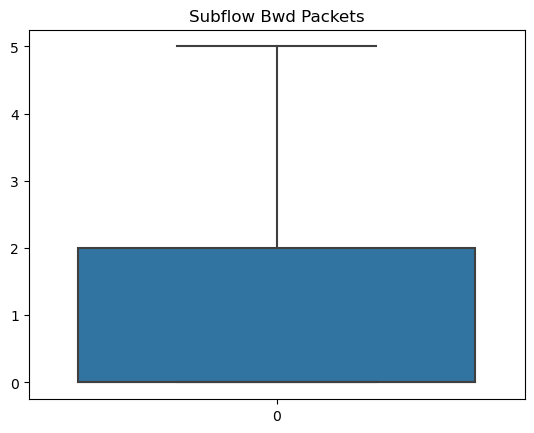

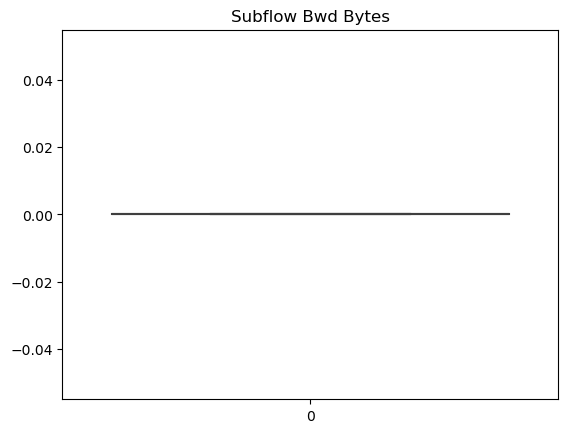

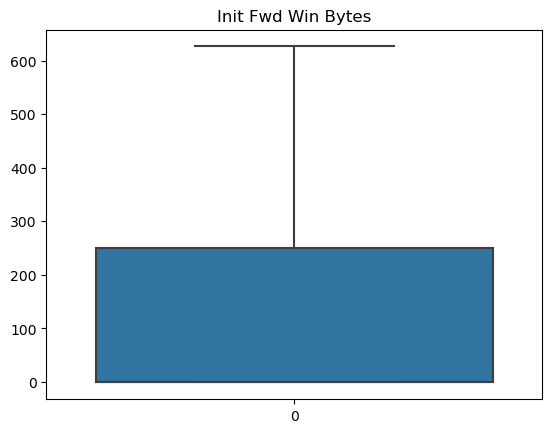

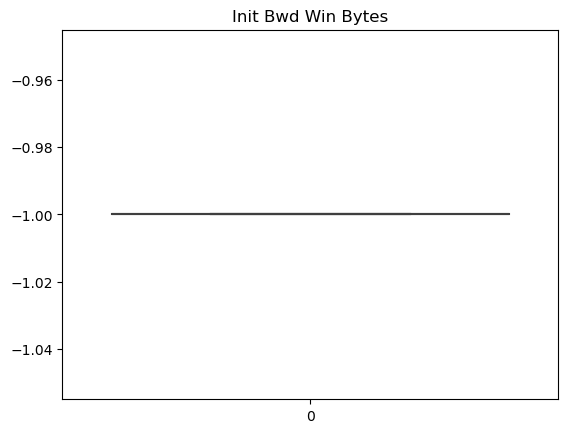

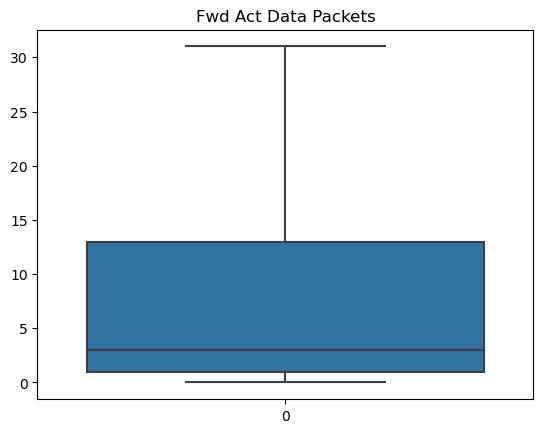

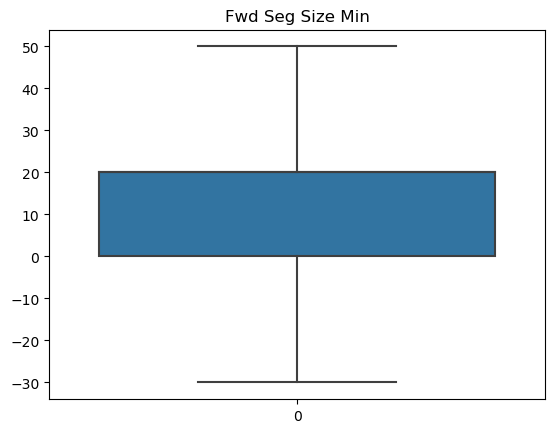

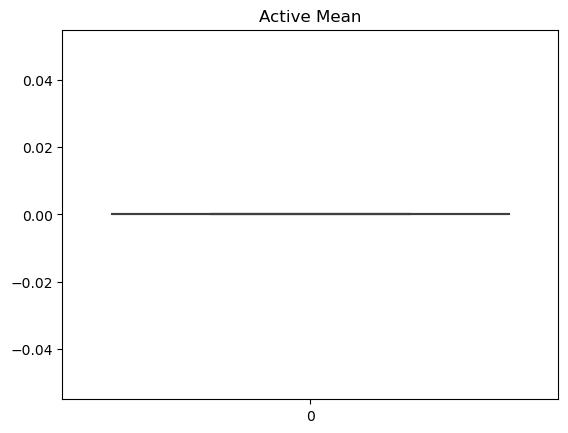

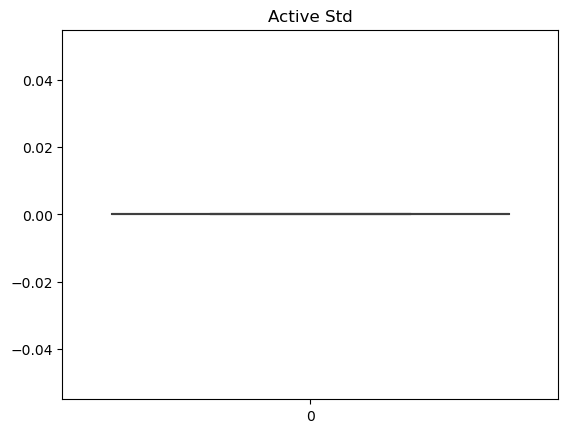

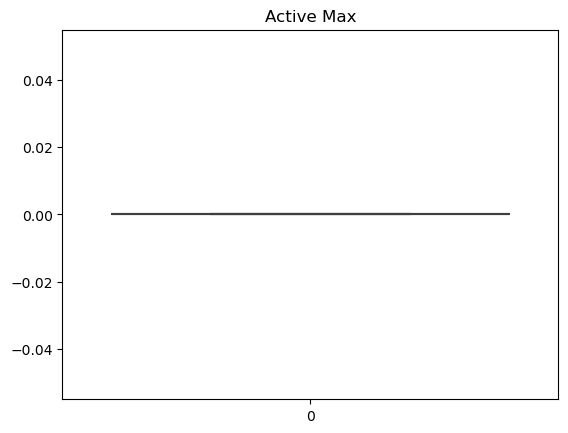

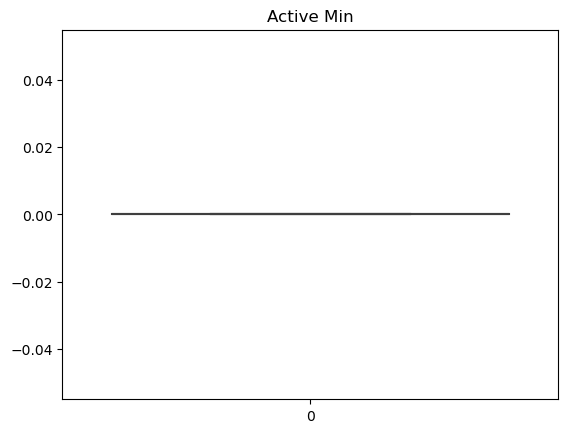

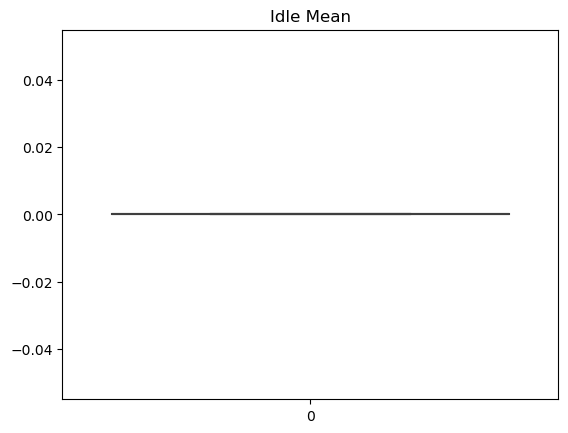

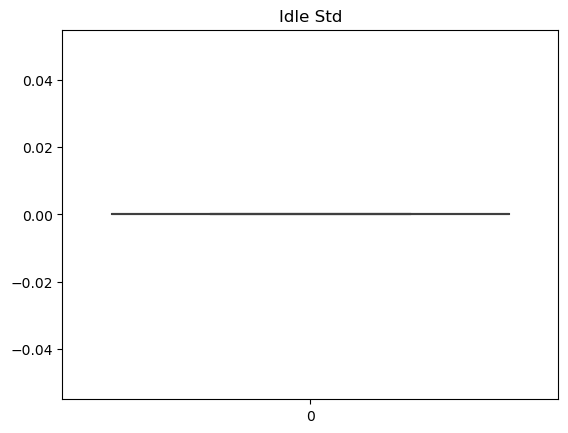

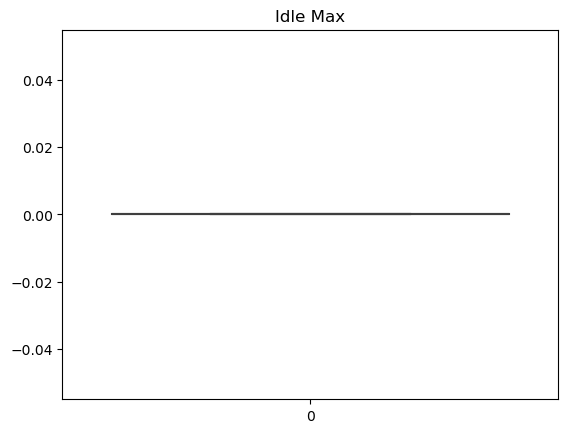

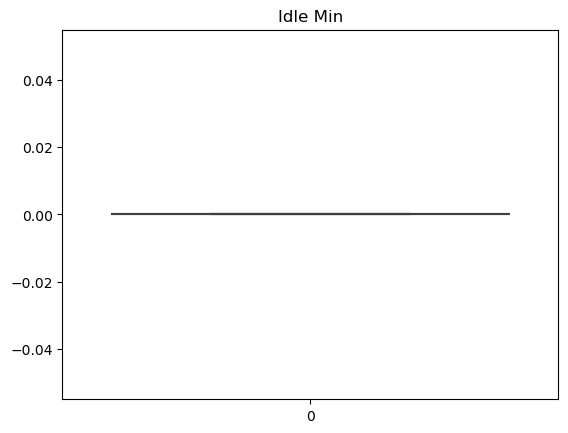

In [15]:
import matplotlib.pyplot as plt

for column in num:
  plt.figure()
  sns.boxplot(df[column])
  plt.title(column)
  plt.show()

In [16]:
null_values=df.isnull().sum()

In [17]:
(df.dtypes=='object')

Unnamed: 0                False
Protocol                  False
Flow Duration             False
Total Fwd Packets         False
Total Backward Packets    False
                          ...  
Idle Std                  False
Idle Max                  False
Idle Min                  False
Label                      True
Class                      True
Length: 80, dtype: bool

In [18]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat:
  df[col] = le.fit_transform(df[col])

y = df['Label']
X = df.drop('Label', axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

df["Label"].value_counts()

4     121368
13     98917
0      97831
12     49373
14     18090
7      10420
15      8872
9       8523
3       6212
1       3669
6       2717
8       1906
2       1440
11       685
10       644
5        598
16        55
17        51
Name: Label, dtype: int64

In [19]:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.9411880614314692


In [20]:
# GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from datetime import datetime

start_time = datetime.now()

y_pred = gnb.predict(X_test)

end_time = datetime.now()

training_time = end_time - start_time
testing_time = end_time - start_time

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Training time:", training_time)
print("Testing time:", testing_time)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9411880614314692
Precision: 0.7661071968577013
Recall: 0.6989890906902425
F1 Score: 0.6595779668698278
Training time: 0:00:01.170171
Testing time: 0:00:01.170171
Confusion Matrix:
[[19619     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0   728     0     0    16     0     0     0     0     0     0     0
      0     0     1     2     0     1]
 [    0     0   251     7     0     0     5     0     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0  1212     0     1     0     0     0     0     0     0
      1     1     0     0     0     0]
 [    0     0     0    23 23962     0     0     0     0    43     0     0
     74     2   184     0    12     0]
 [    0     0     0   104     0     3     2     1     0     0     1     0
      1     0     0     0     0     0]
 [    0     0     0    16     0     1   540     0     0     0     0     0
      0     0     0     0     0     0]
 [    0     0    

In [21]:
import time
start_time = time.time()

gnb.fit(X_train, y_train)

training_time = time.time() - start_time
start_time = time.time()
y_pred = gnb.predict(X_test)

testing_time = time.time() - start_time

print("Training time:", training_time, "seconds")
print("Testing time:", testing_time, "seconds")


Training time: 0.4819674491882324 seconds
Testing time: 1.0917723178863525 seconds


In [22]:

import datetime

now = datetime.datetime.utcnow()

epoch = now.timestamp()

print(epoch)


1719807408.437407


In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import time

# Different values for the var_smoothing parameter
var_smoothing_values = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]

# Loop through the different var_smoothing values and observe the results
for var_smoothing in var_smoothing_values:
    # Measure training time
    train_start_time = time.time()
    gnb = GaussianNB(var_smoothing=var_smoothing)
    gnb.fit(X_train, y_train)
    train_end_time = time.time()
    training_time = train_end_time - train_start_time

    # Measure testing time
    test_start_time = time.time()
    y_pred = gnb.predict(X_test)
    test_end_time = time.time()
    testing_time = test_end_time - test_start_time

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"\nResults for var_smoothing={var_smoothing}:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Training time: {:.6f} seconds".format(training_time))
    print("Testing time: {:.6f} seconds".format(testing_time))

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))



Results for var_smoothing=1e-09:
Accuracy: 0.9411880614314692
Precision: 0.7661071968577013
Recall: 0.6989890906902425
F1 Score: 0.6595779668698278
Training time: 0.525290 seconds
Testing time: 1.179580 seconds
Confusion Matrix:
[[19619     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0   728     0     0    16     0     0     0     0     0     0     0
      0     0     1     2     0     1]
 [    0     0   251     7     0     0     5     0     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0  1212     0     1     0     0     0     0     0     0
      1     1     0     0     0     0]
 [    0     0     0    23 23962     0     0     0     0    43     0     0
     74     2   184     0    12     0]
 [    0     0     0   104     0     3     2     1     0     0     1     0
      1     0     0     0     0     0]
 [    0     0     0    16     0     1   540     0     0     0     0     0
      0     0     


Results for var_smoothing=1e-06:
Accuracy: 0.9413155607070415
Precision: 0.779061961712566
Recall: 0.7042858057508852
F1 Score: 0.6666552092546163
Training time: 0.492868 seconds
Testing time: 1.163011 seconds
Confusion Matrix:
[[19619     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0   728     0     0    16     0     0     0     0     0     0     0
      0     0     1     2     0     1]
 [    0     0   261     2     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     7  1205     0     1     0     0     0     0     0     0
      1     1     0     0     0     0]
 [    0     0     0    19 23962     0     0     0     0    47     0     0
     74     2   184     0    12     0]
 [    0     0     0    97     0    10     2     1     0     0     1     0
      1     0     0     0     0     0]
 [    0     0     0     9     0     1   540     0     0     7     0     0
      0     0     0

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat:
  df[col] = le.fit_transform(df[col])

y = df['Label']
X = df.drop('Label', axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


svm = SVC(kernel='linear', C=1.0)

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)

print(report)
start_time = time.time()

svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

training_time = time.time() - start_time
start_time = time.time()
y_pred = svm.predict(X_test)

testing_time = time.time() - start_time

print("Training time:", training_time, "seconds")
print("Testing time:", testing_time, "seconds")
current_time = datetime.now()

epoch_time = int(current_time.timestamp())

print("Epoch time:", epoch_time)

Accuracy: 0.9899043755433208
Confusion Matrix:
[[19619     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0   738     0     0     0     0     0     0     0     0     0     0
      0     0     8     2     0     0]
 [    0     0   256     7     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0     0    22  1193     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     1    11 24288     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0    21     0    88     2     0     0     0     0     0
      1     0     0     0     0     0]
 [    0     0     5     0     0    15   537     0     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0     0     1     1  2083     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0

AttributeError: type object 'datetime.datetime' has no attribute 'datetime'